<a href="https://colab.research.google.com/github/MittalNeha/similar_faces/blob/main/CelebA_faceSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MCNN model
This is the implementation of the paper "Attributes for Improved Attributes: A
Multi-Task Network for Attribute Classification" - 
Emily M. Hand and Rama Chellappa


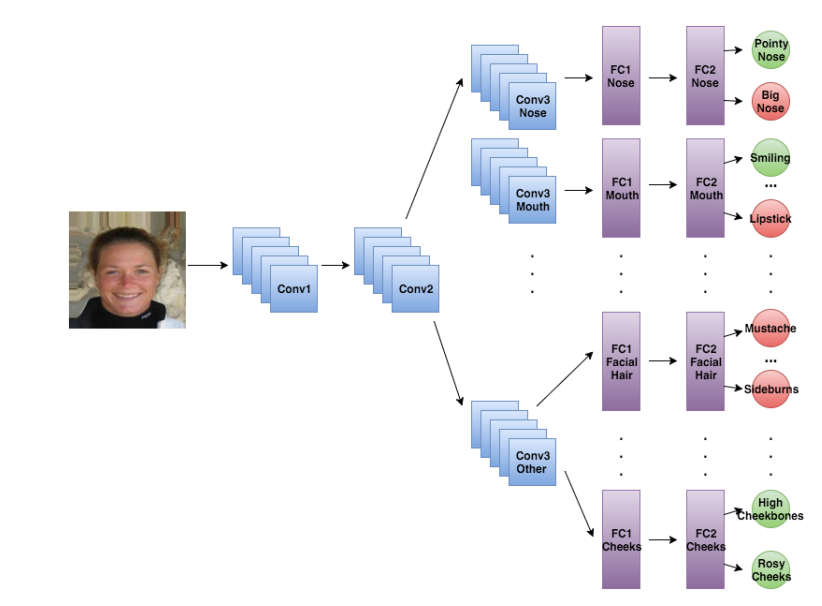


In [3]:
!git clone https://github.com/MittalNeha/similar_faces.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
#import torch
#import torchvision.transforms as transforms
from PIL import Image

import matplotlib.pyplot as plt

In [ ]:
import similar_faces
from similar_faces import *
# from similar_faces import main
from similar_faces.dataset import FaceAttributesDataset

from similar_faces.main import attributes_model

from similar_faces import dataset
from similar_faces.similar_faces import FaceSimilarity

In [ ]:
use_cuda = 1
device = torch.device("cuda" if use_cuda else "cpu")

## Get the dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q /content/celeba-dataset.zip 

#Analyse the datset

In [ ]:
#Folder and image files
baseFolder = '/content/'
imgFolder = 'img_align_celeba/img_align_celeba'

visual_dataset = FaceAttributesDataset(baseFolder, imgFolder, 'list_attr_celeba.csv')

In [ ]:
data = next(iter(visual_dataset))
print(data['image'])
print(data['attr'])

Plot sample images from CelebA dataset

In [ ]:
figure = plt.figure(figsize=(6, 12))
rows, cols = 5,2
inc = 100
for idx in range(1, cols * rows + 1):
    sample = visual_dataset[idx+inc]
    figure.add_subplot(rows,cols,idx)
    plt.imshow(sample['image'])
    plt.axis("off")
plt.show()

#Finding similar Faces

Train the MCNN model

In [ ]:
net, hist = attributes_model()

Initialize the class for Face similarity

In [ ]:
fs = FaceSimilarity(dataset.allAttributes)
print("Trained a w2v model of {} vector_size".format(fs.model.wv.vector_size))

Load a test image and find 5 most similar images from the trainset

In [ ]:
img_name = 'img_align_celeba/img_align_celeba/000010.jpg' #images for testing
test_image = Image.open(img_name)
#Test image
plt.title("Test Image")
plt.axis("off")
plt.imshow(test_image)

transform = transforms.Compose([
    # other transformations to be added in this list
    transforms.ToTensor()
])

test_image = test_image.resize((227,227))
test_image = transform(test_image)

test_out = net(test_image.unsqueeze(0).to(device))
print(test_out)
sim_images = fs.similar_faces(test_out, dataset.groups, 5)

Plot the similar faces

In [ ]:
figure = plt.figure(figsize=(16, 12))
rows, cols = 1, len(sim_images)
for idx in range(1, cols * rows+1):
    sample = Image.open('/content/img_align_celeba/img_align_celeba/' + sim_images[idx-1])
    figure.add_subplot(rows,cols,idx)
    plt.imshow(sample)
    plt.title(sim_images[idx-1])
    plt.axis("off")
plt.show()

In [ ]:
# import importlib
# importlib.reload(similar_faces.similar_faces)